In [1]:
!pip install ultralytics

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import os
from ultralytics import YOLO
from IPython.display import display, Image
from IPython import display
import torch
import cv2
import matplotlib.pyplot as plt
import numpy as np

display.clear_output()
!yolo mode = checks

Traceback (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "c:\Users\rk001\AppData\Roaming\Python\Python312\Scripts\yolo.exe\__main__.py", line 7, in <module>
  File "C:\Users\rk001\AppData\Roaming\Python\Python312\site-packages\ultralytics\cfg\__init__.py", line 919, in entrypoint
    raise ValueError(f"Invalid 'mode={mode}'. Valid modes are {MODES}.\n{CLI_HELP_MSG}")
ValueError: Invalid 'mode=<module 'ultralytics.utils.checks' from 'C:\\Users\\rk001\\AppData\\Roaming\\Python\\Python312\\site-packages\\ultralytics\\utils\\checks.py'>'. Valid modes are frozenset({'export', 'track', 'val', 'predict', 'train', 'benchmark'}).

    Arguments received: ['yolo', 'mode', '=', 'checks']. Ultralytics 'yolo' commands use the following syntax:

        yolo TASK MODE ARGS

        Where   TASK (optional) is one of frozenset({'obb', 'classify', 'detect', 'pose', 'segment'})
                MODE (required) is on

C:\Users\rk001\AppData\Local\Temp\ipykernel_14604\3987733802.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(x=classes, y=counts, palette=colors)


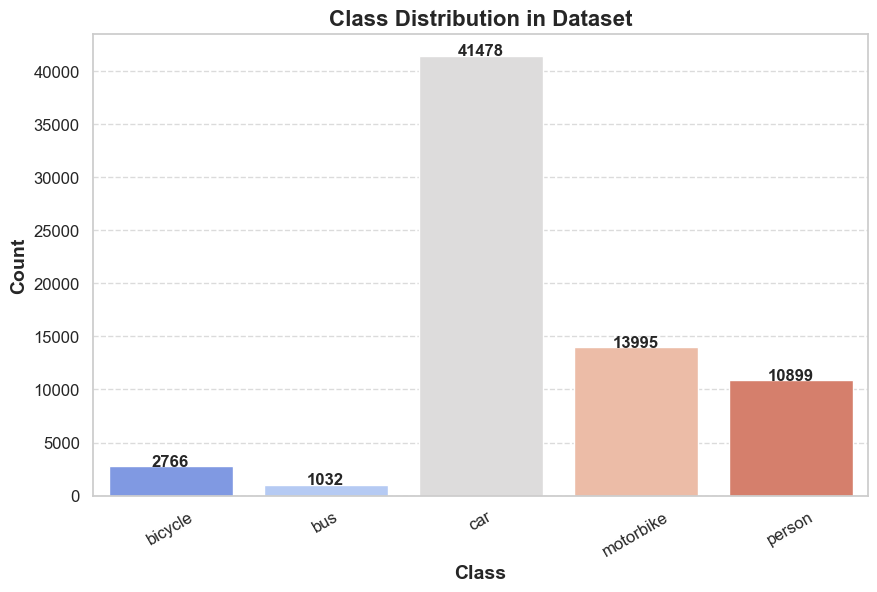

In [5]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set Seaborn style
sns.set_theme(style="whitegrid")

# Define your class labels
class_names = ['bicycle', 'bus', 'car', 'motorbike', 'person']
num_classes = len(class_names)

# Path to your labels directory
label_dir = "C:/Users/rk001/OneDrive/Desktop/project_obj/train/labels"

# Initialize a dictionary to store class counts
class_counts = {i: 0 for i in range(num_classes)}

# Read YOLO label files
for label_file in os.listdir(label_dir):
    if label_file.endswith(".txt"):
        with open(os.path.join(label_dir, label_file), "r") as f:
            for line in f:
                class_id = int(line.split()[0])  # Extract class ID
                if class_id in class_counts:
                    class_counts[class_id] += 1

# Convert dictionary to lists
classes = [class_names[i] for i in class_counts.keys()]
counts = list(class_counts.values())

# Create a color gradient
colors = sns.color_palette("coolwarm", len(classes))

# Plot the bar chart
plt.figure(figsize=(10, 6))
bars = sns.barplot(x=classes, y=counts, palette=colors)

# Add value labels
for bar in bars.patches:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 2, 
             int(bar.get_height()), ha='center', fontsize=12, fontweight='bold')

# Titles and labels
plt.xlabel("Class", fontsize=14, fontweight="bold")
plt.ylabel("Count", fontsize=14, fontweight="bold")
plt.title("Class Distribution in Dataset", fontsize=16, fontweight="bold")
plt.xticks(rotation=30, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show the graph
plt.show()


In [6]:
from ultralytics import YOLO
import os
from IPython.display import display, Image
from IPython import display
display.clear_output()
!yolo checks



Ultralytics 8.3.65 🚀 Python-3.12.6 torch-2.4.1+cpu CPU (Intel Core(TM) i3-1005G1 1.20GHz)
Setup complete ✅ (4 CPUs, 7.7 GB RAM, 107.6/237.4 GB disk)

OS                  Windows-11-10.0.26100-SP0
Environment         Windows
Python              3.12.6
Install             pip
RAM                 7.74 GB
Disk                107.6/237.4 GB
CPU                 Intel Core(TM) i3-1005G1 1.20GHz
CPU count           4
GPU                 None
GPU count           None
CUDA                None

numpy               ✅ 1.26.4>=1.23.0
numpy               ✅ 1.26.4<2.0.0; sys_platform == "darwin"
matplotlib          ✅ 3.10.0>=3.3.0
opencv-python       ✅ 4.10.0.84>=4.6.0
pillow              ✅ 10.4.0>=7.1.2
pyyaml              ✅ 6.0.2>=5.3.1
requests            ✅ 2.32.3>=2.23.0
scipy               ✅ 1.14.1>=1.4.1
torch               ✅ 2.4.1>=1.8.0
torch               ✅ 2.4.1!=2.4.0,>=1.8.0; sys_platform == "win32"
torchvision         ✅ 0.19.1>=0.9.0
tqdm                ✅ 4.66.5>=4.64.0
psutil          

In [7]:
!wandb disabled

W&B disabled.


# **Loading the YOLOv8 Model**

In [9]:
!yolo detect train model=yolov8n.pt data="C:\Users\rk001\OneDrive\Desktop\project_obj\data.yaml" epochs=10 imgsz=640


^C


# **Results Visualization**

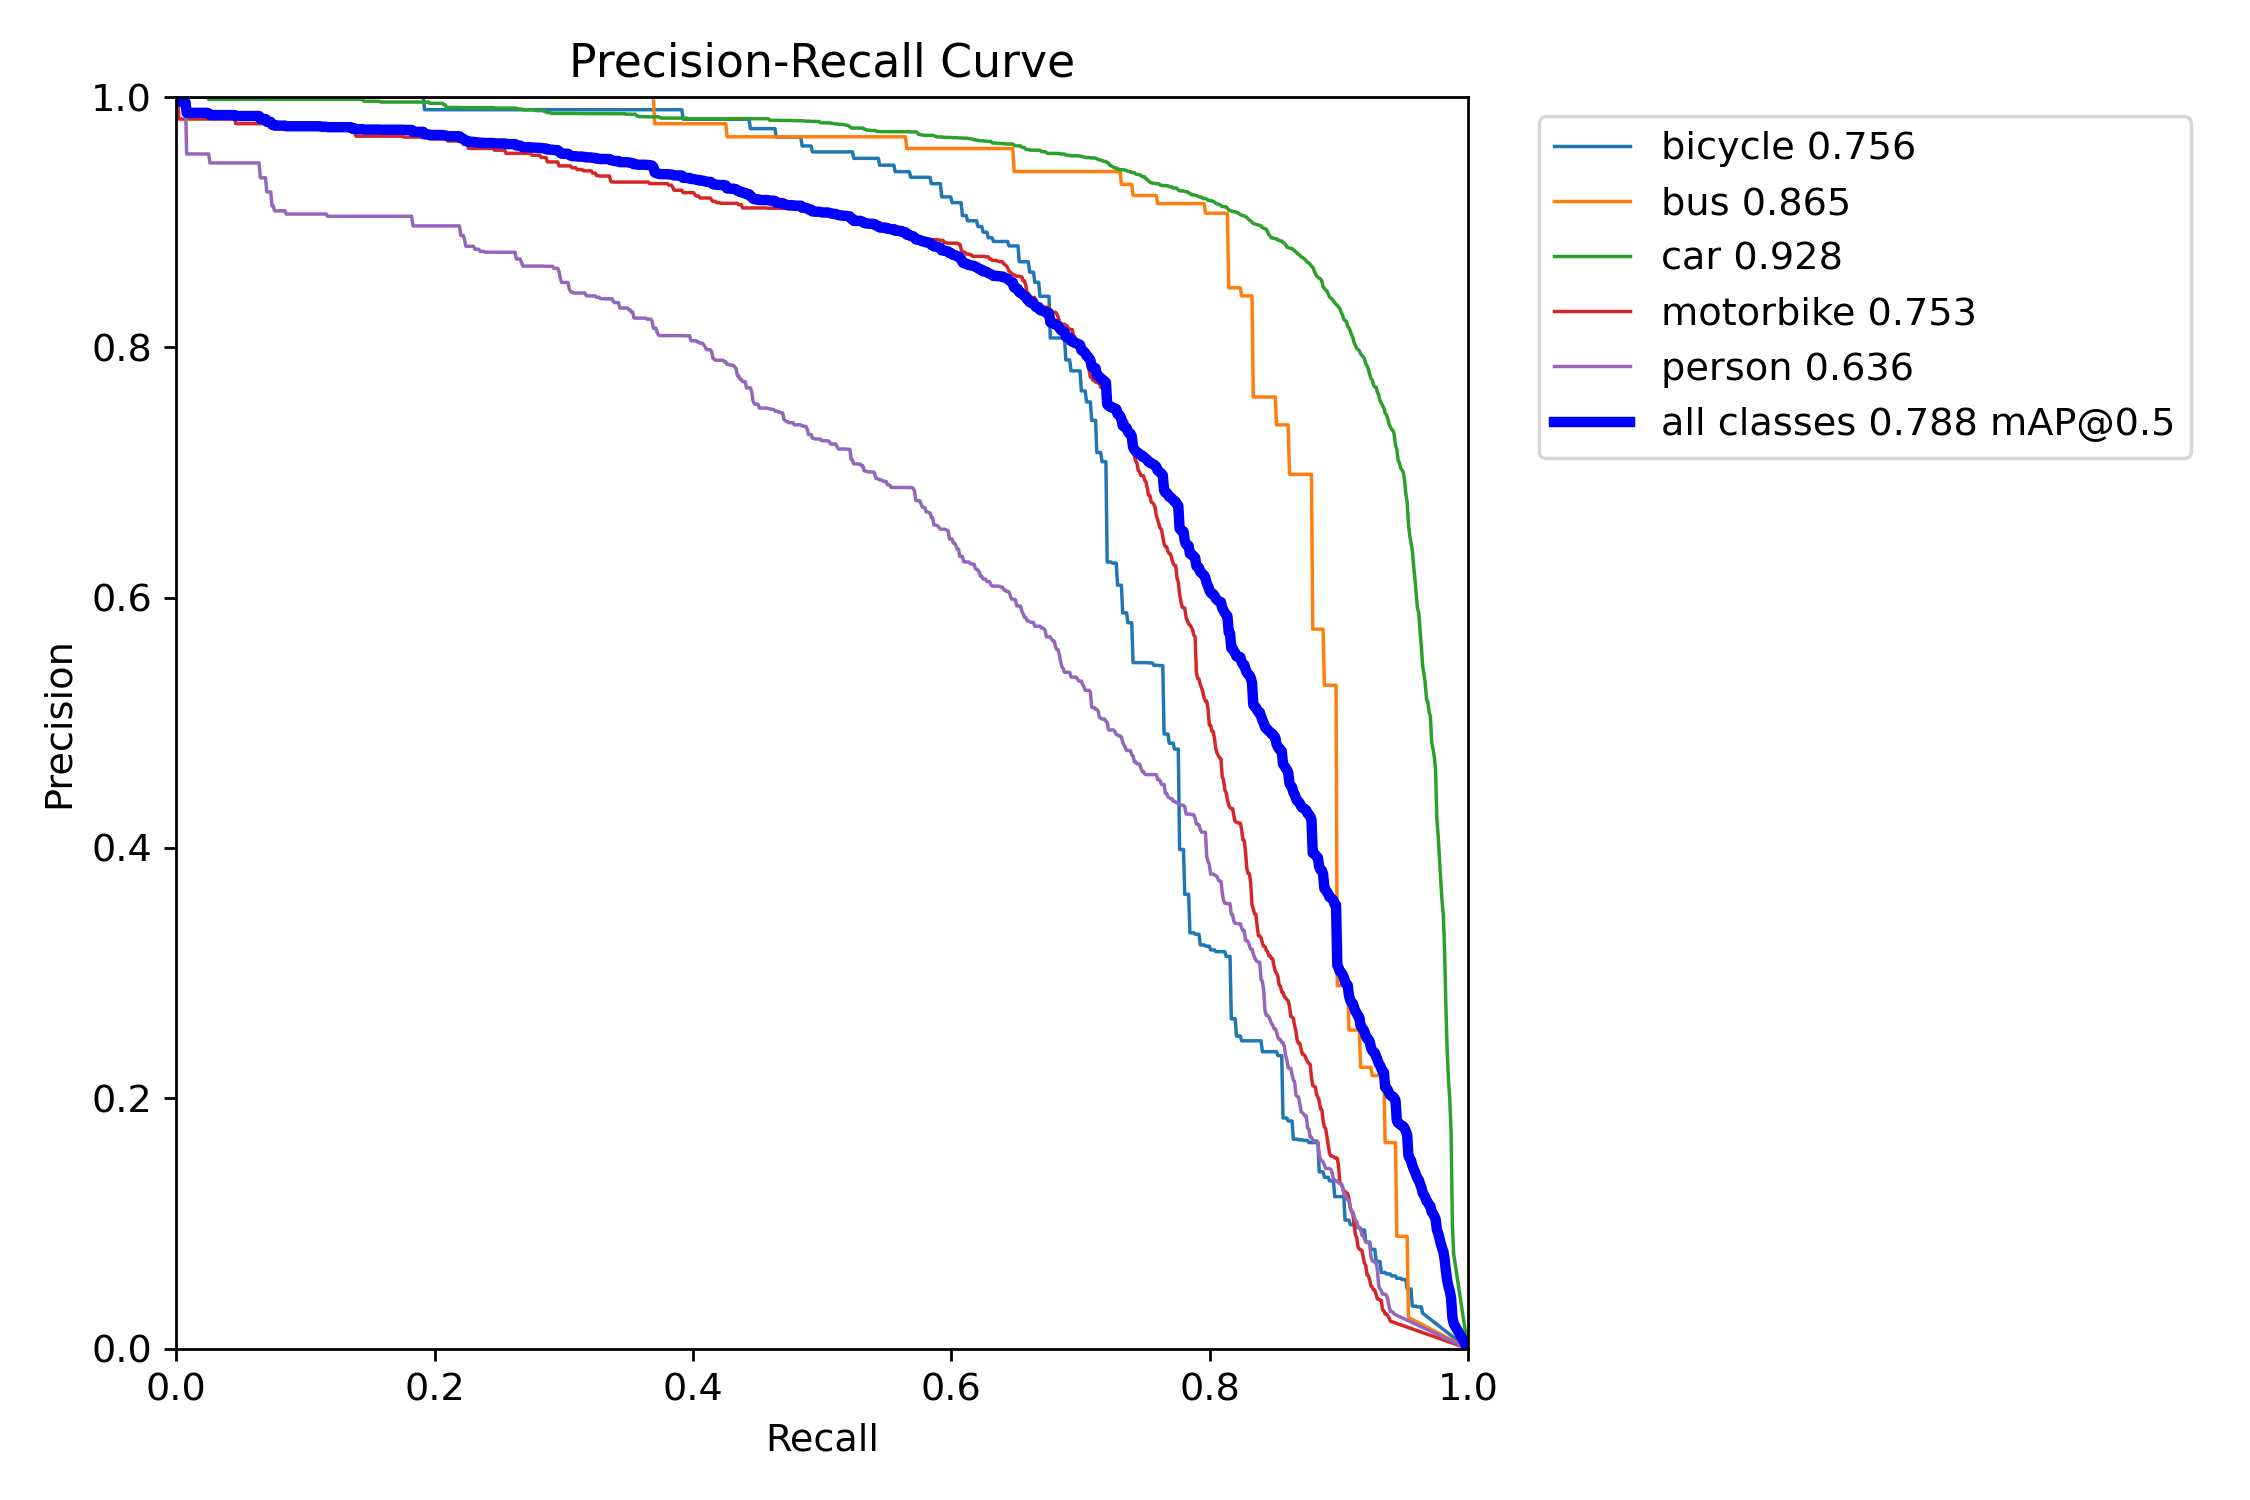

In [5]:
Image(filename = "/kaggle/working/runs/detect/train2/PR_curve.png", width = 600)

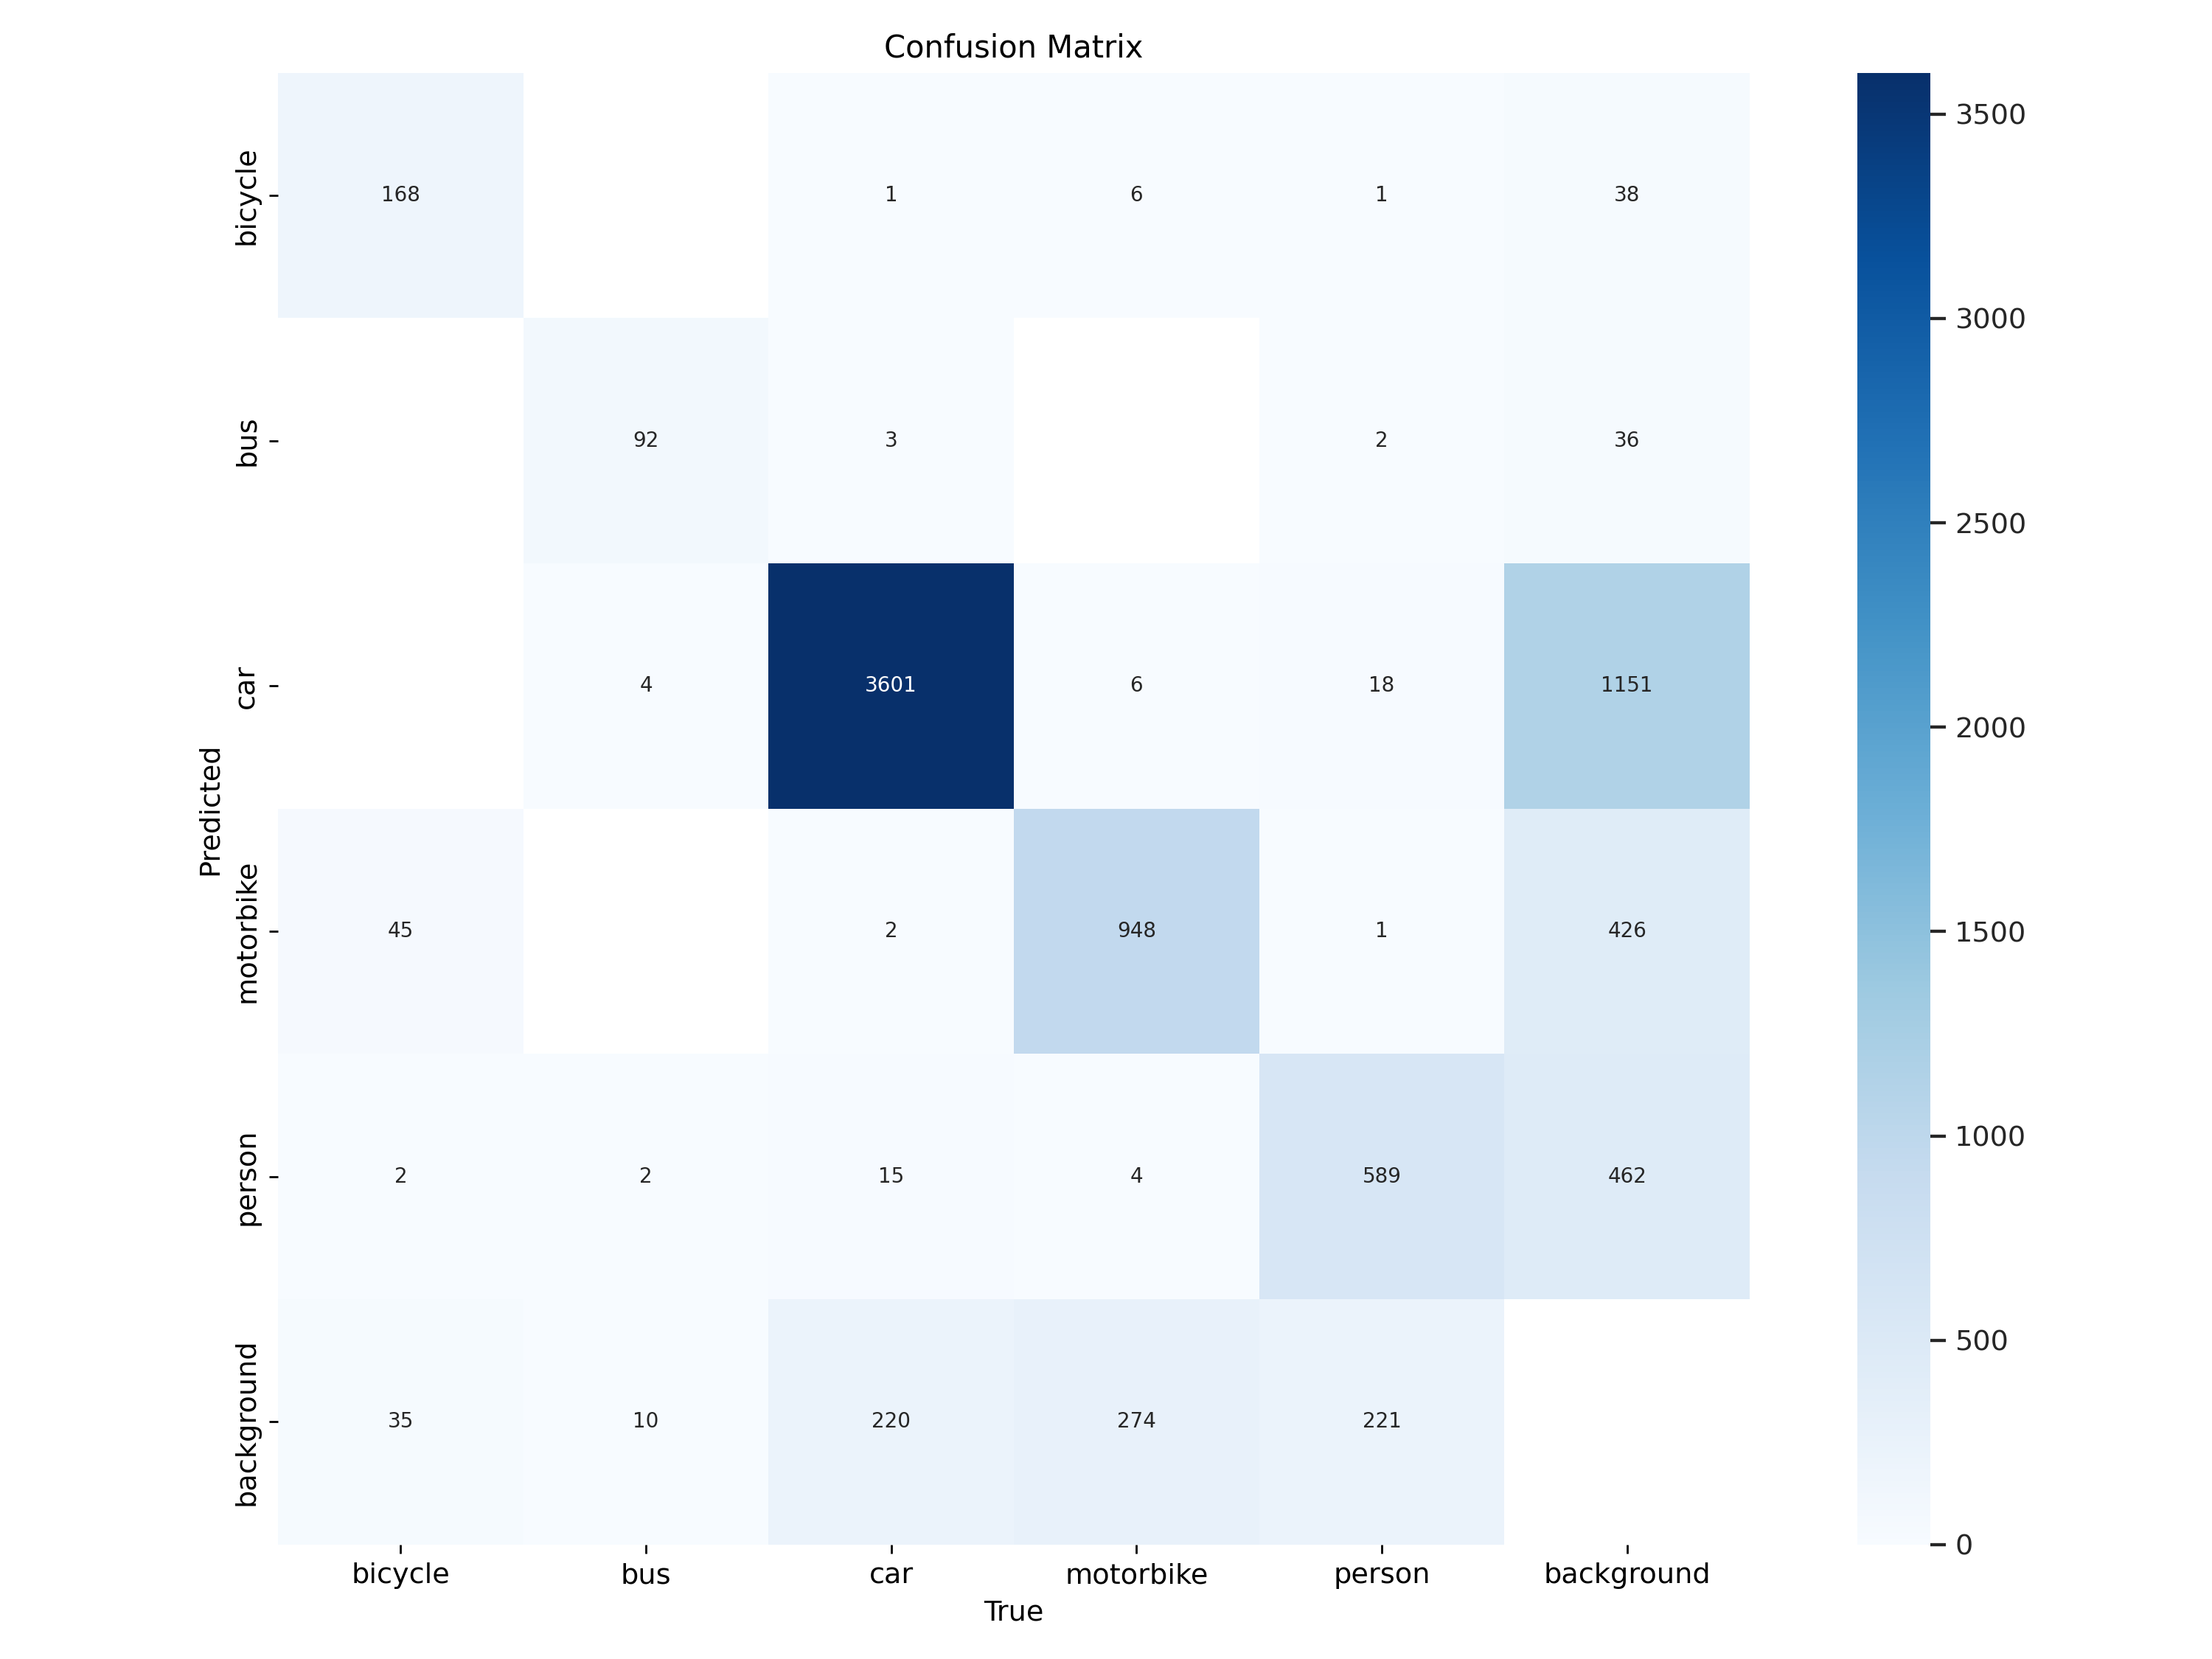

In [6]:
Image(filename = "/kaggle/working/runs/detect/train2/confusion_matrix.png", width = 600)

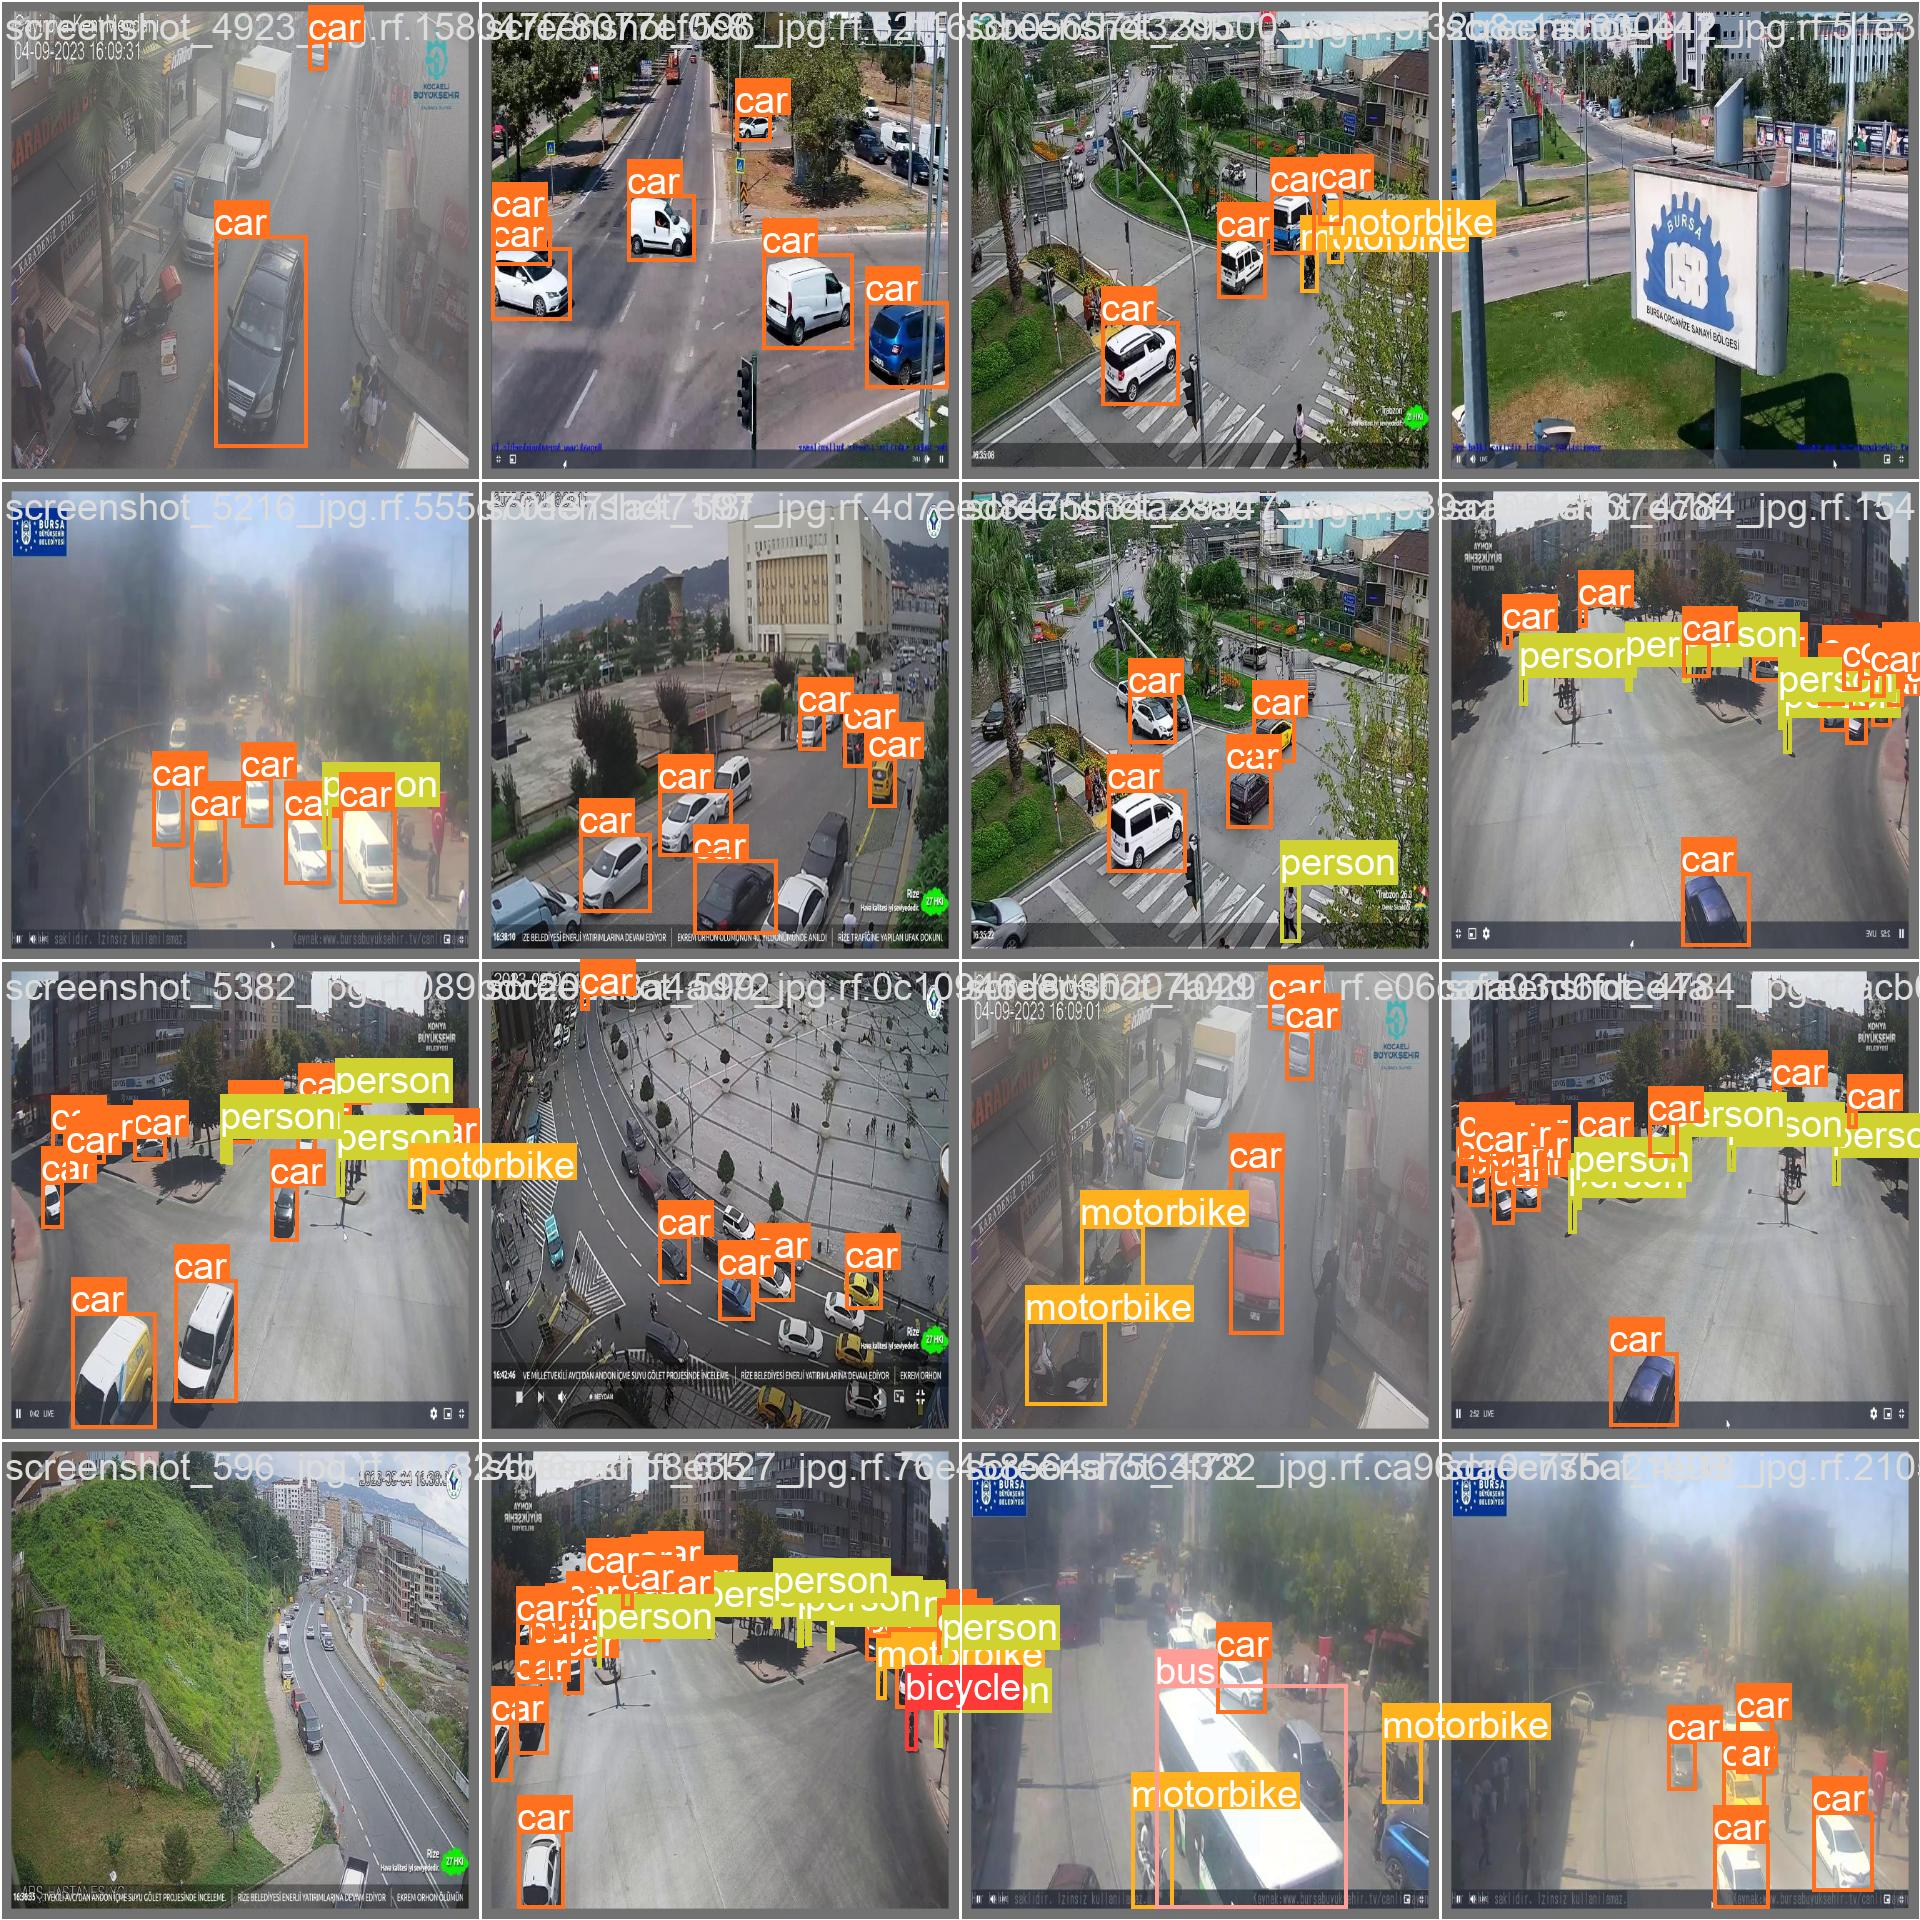

In [7]:
Image(filename = "/kaggle/working/runs/detect/train2/val_batch1_labels.jpg", width = 600)

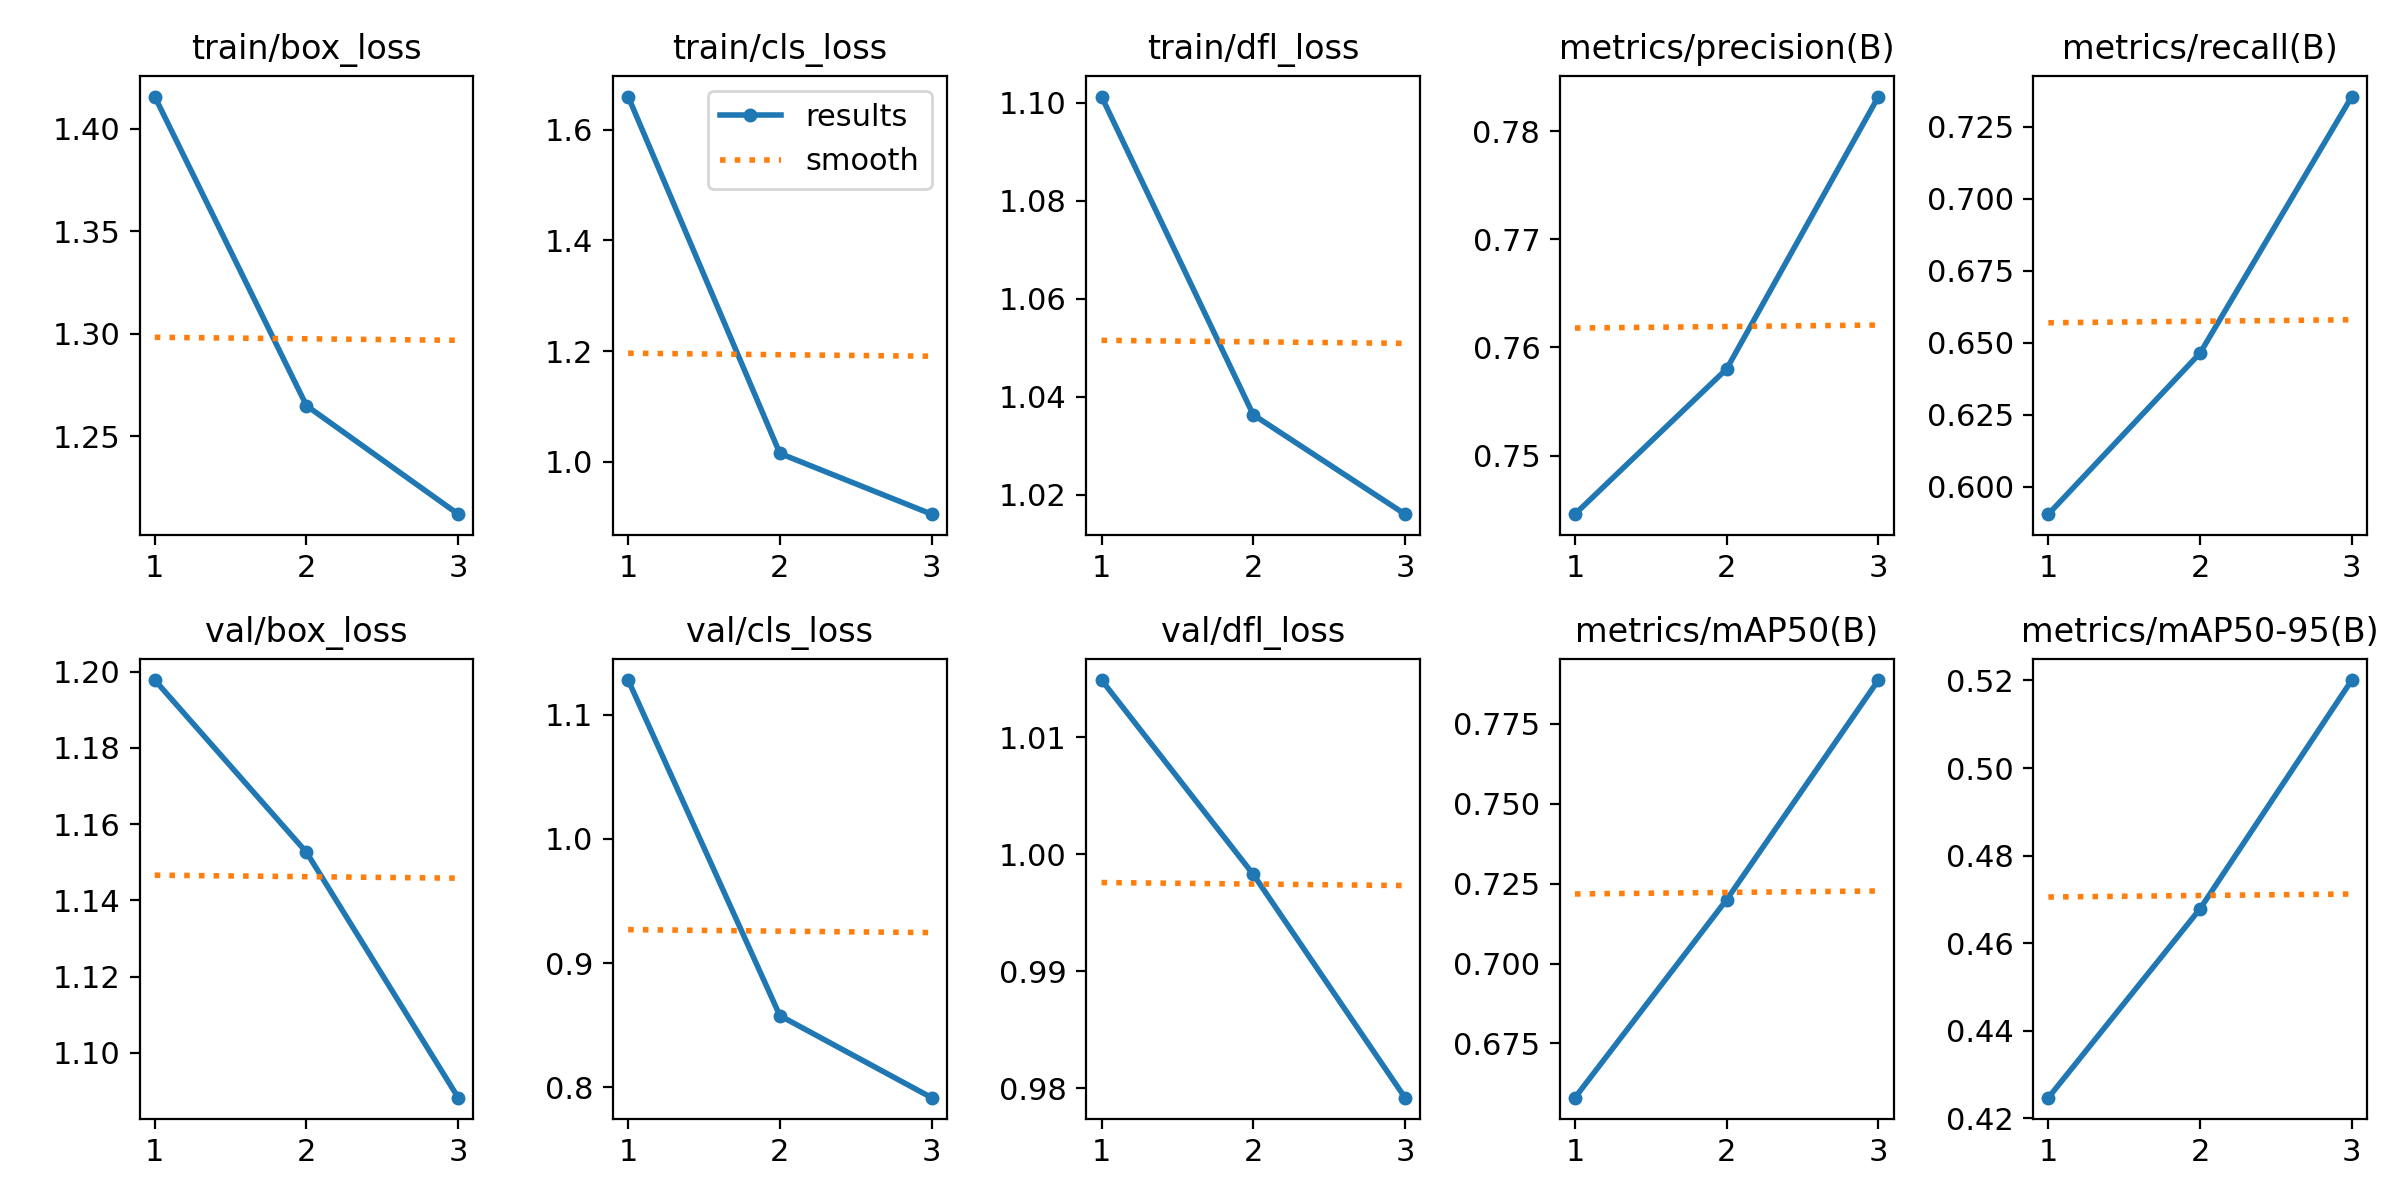

In [8]:
Image(filename = "/kaggle/working/runs/detect/train/results.png", width = 600)

# **Model Validation as a separate step**

In [9]:
val_results = model.val(model = "/kaggle/working/runs/detect/train3/weights/best.pt",  data="/kaggle/input/traffic-detection-project/data.yaml")

Ultralytics YOLOv8.2.31 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15102MiB)


val: Scanning /kaggle/input/traffic-detection-project/valid/labels... 549 images, 8 backgrounds, 0 corrupt: 100%|██████████| 549/549 [00:01<00:00, 534.97it/s]

val: WARNING ⚠️ Cache directory /kaggle/input/traffic-detection-project/valid is not writeable, cache not saved.



/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:16<00:00,  2.17it/s]


                   all        549       6270      0.782      0.735      0.788      0.521
               bicycle        189        250      0.881      0.652      0.756      0.521
                   bus         81        108      0.759      0.833      0.865       0.69
                   car        520       3842      0.816      0.908      0.928      0.675
             motorbike        331       1238      0.766      0.718      0.753      0.413
                person        196        832      0.687      0.561      0.636      0.306
Speed: 0.3ms preprocess, 3.8ms inference, 0.0ms loss, 1.4ms postprocess per image
Results saved to runs/detect/train3


# **Results Visualization**

Showing same graphs as we previously validated while training

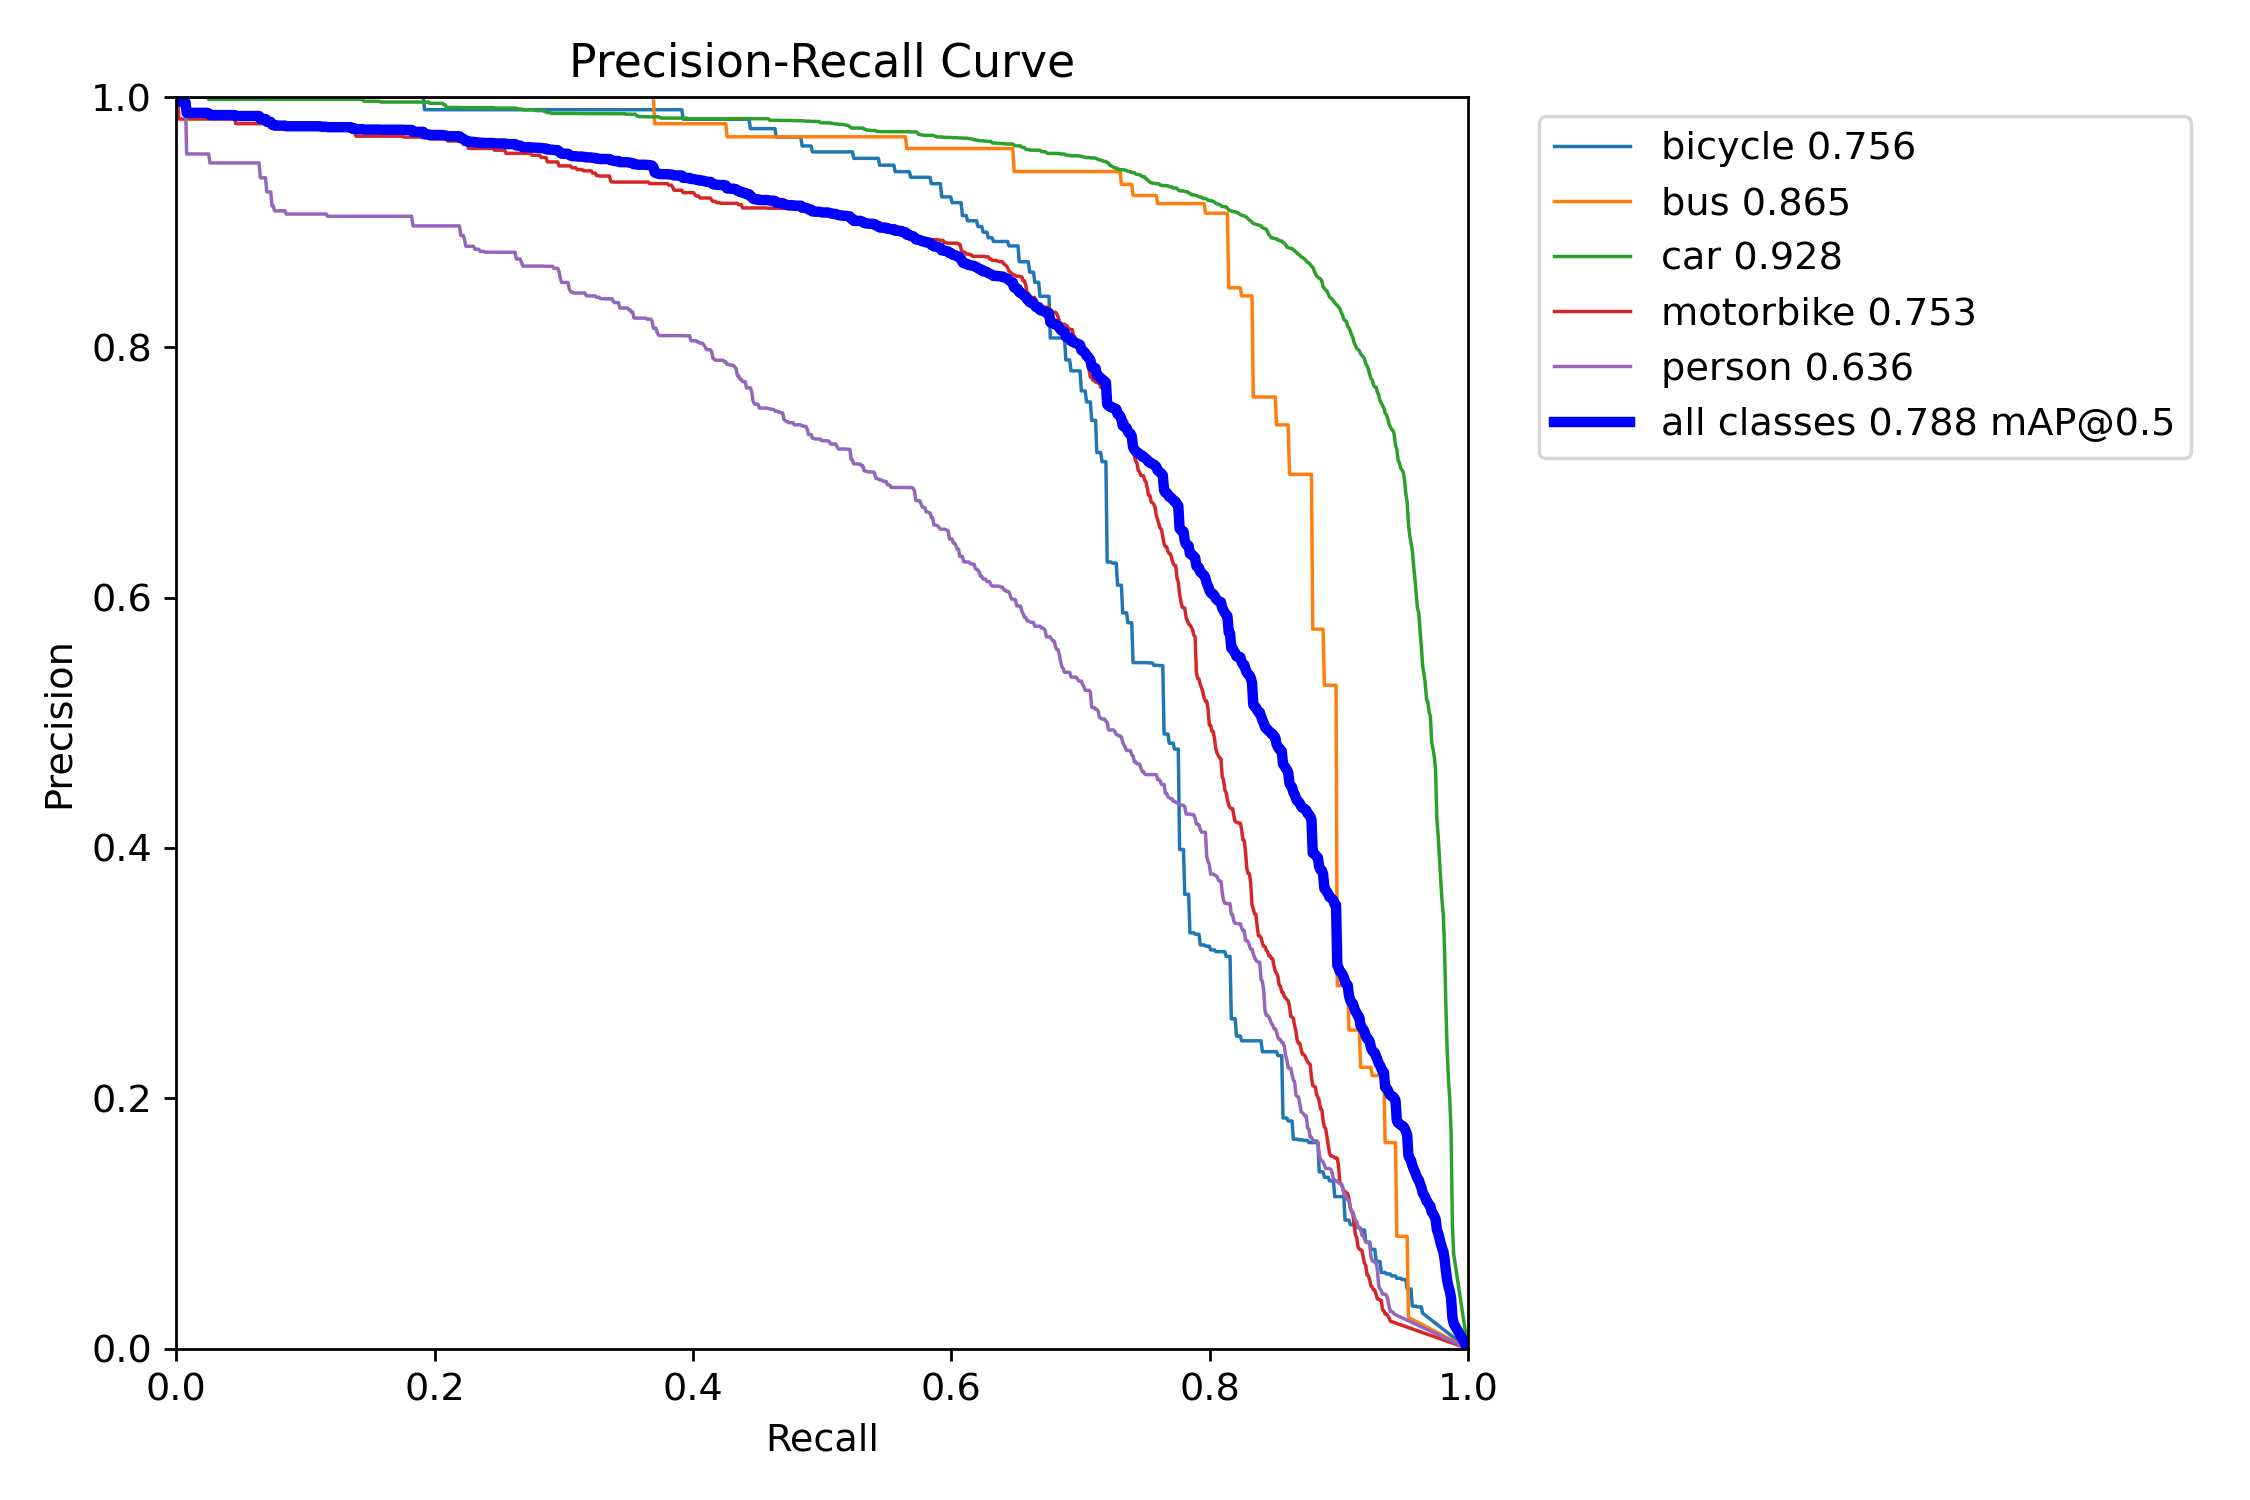

In [10]:
Image(filename = "/kaggle/working/runs/detect/train3/PR_curve.png", width = 600)

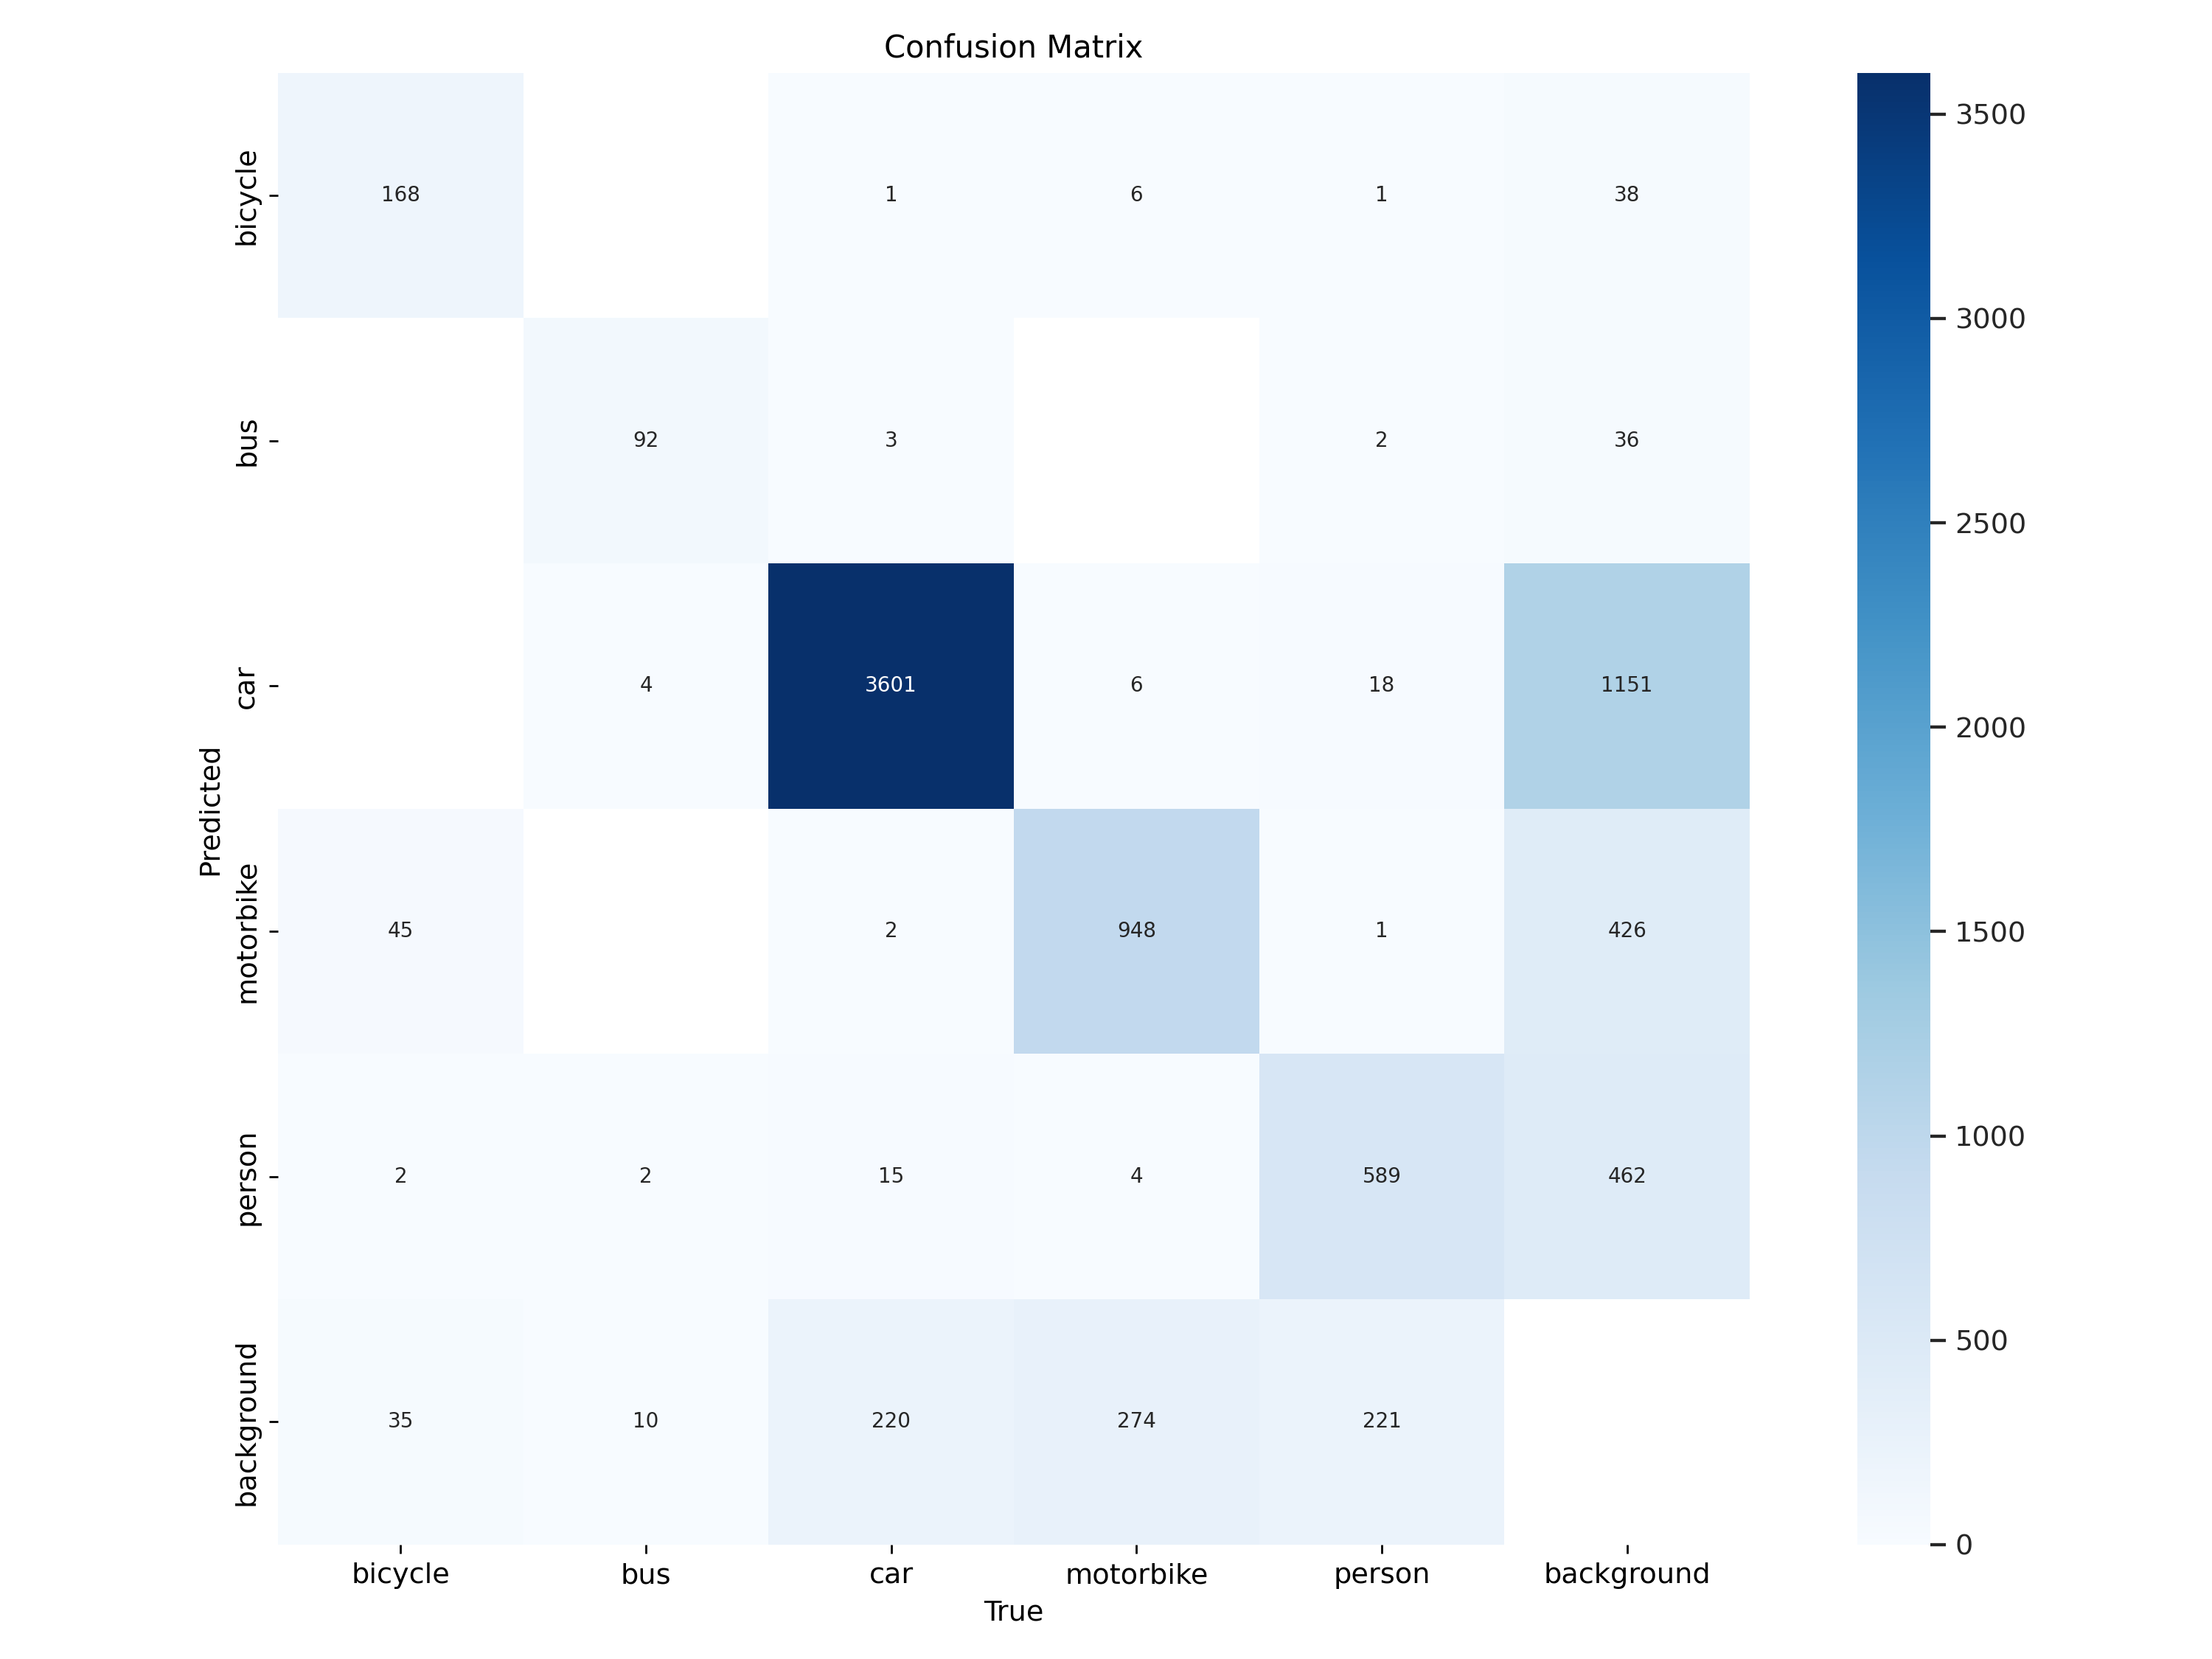

In [11]:
Image(filename = "/kaggle/working/runs/detect/train3/confusion_matrix.png", width = 600)

# **Prediction**

Using Device:  cuda


100%|██████████| 49.7M/49.7M [00:00<00:00, 210MB/s] 


YOLOv8m summary (fused): 218 layers, 25886080 parameters, 0 gradients, 78.9 GFLOPs

0: 640x640 1 person, 1 bicycle, 21 cars, 1 bus, 38.5ms
Speed: 3.6ms preprocess, 38.5ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


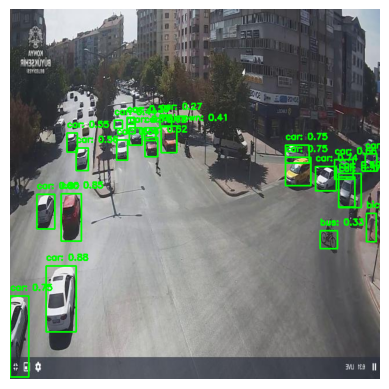


0: 640x640 9 persons, 11 cars, 1 airplane, 1 bus, 1 truck, 1 kite, 37.4ms
Speed: 1.8ms preprocess, 37.4ms inference, 2.7ms postprocess per image at shape (1, 3, 640, 640)


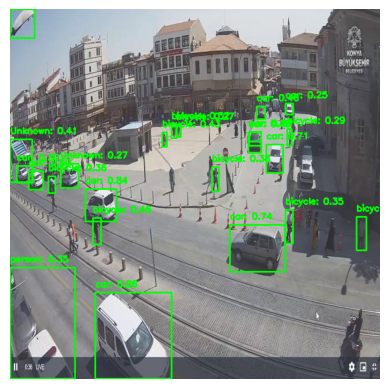


0: 640x640 1 person, 5 cars, 1 motorcycle, 9 trucks, 37.4ms
Speed: 2.1ms preprocess, 37.4ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


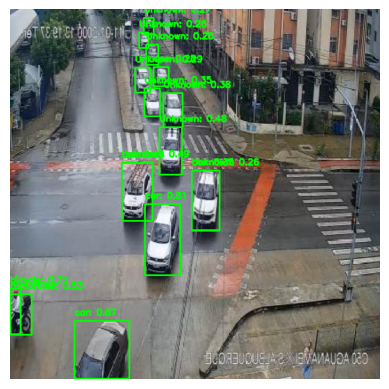


0: 640x640 1 person, 17 cars, 37.4ms
Speed: 2.1ms preprocess, 37.4ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


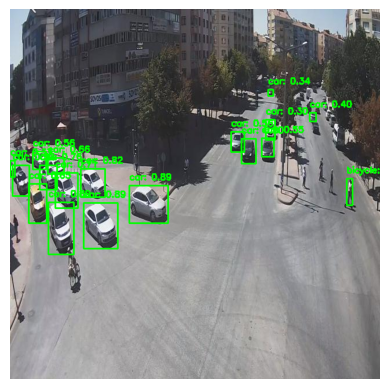


0: 640x640 5 cars, 1 bus, 1 truck, 37.4ms
Speed: 2.6ms preprocess, 37.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


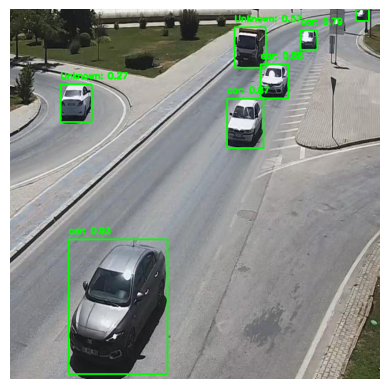


0: 640x640 3 persons, 3 cars, 2 trucks, 3 traffic lights, 37.5ms
Speed: 2.1ms preprocess, 37.5ms inference, 2.7ms postprocess per image at shape (1, 3, 640, 640)


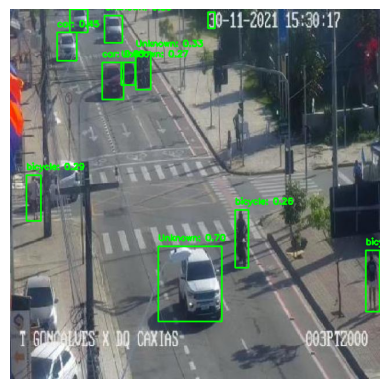

In [12]:
import torch
import cv2
from ultralytics import YOLO
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

class ObjectDetection:
    # Custom class names
    CUSTOM_CLASSES = ['bicycle', 'bus', 'car', 'motorbike', 'person']
    
    def __init__(self):
        self.device = "cuda" if torch.cuda.is_available() else "cpu"
        print("Using Device: ", self.device)
        self.model = self.load_model()
        
    def load_model(self):
        model = YOLO("yolov8m.pt")  # Load pretrained YOLOv8 model
        model.fuse()  # Optimize the model for inference
        return model
    
    def predict(self, image):
        results = self.model(image)
        return results
    
    def plot_bboxes(self, results, image):
        xyxys = []
        confidences = []
        class_ids = []

        # Extract detections for each result
        for result in results:
            boxes = result.boxes.cpu().numpy()
            for box in boxes:
                # Append specific attributes
                xyxy = box.xyxy[0]
                conf = box.conf[0]
                cls = int(box.cls[0])  # Convert to integer for indexing
                
                xyxys.append(xyxy)
                confidences.append(conf)
                class_ids.append(cls)
                
                # Draw bounding box
                cv2.rectangle(image, (int(xyxy[0]), int(xyxy[1])), (int(xyxy[2]), int(xyxy[3])), (0, 255, 0), 2)
                if int(cls) < len(self.CUSTOM_CLASSES):  # Ensure class ID is within range
                    label = f"{self.CUSTOM_CLASSES[int(cls)]}: {conf:.2f}"  # Use custom class names
                else:
                    label = f"Unknown: {conf:.2f}"
                cv2.putText(image, label, (int(xyxy[0]), int(xyxy[1]) - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
        
    # Convert image back to RGB for matplotlib
        image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        return image_rgb, xyxys, confidences, class_ids
    
    def display_results(self, image_rgb):
        plt.imshow(image_rgb)
        plt.axis('off')
        plt.show()

# Usage example
def main():
    detector = ObjectDetection()
    
    # Load an image (you can replace this with your image path)
    images = os.listdir("/kaggle/input/traffic-detection-project/test/images")
    for i , image_path in enumerate(images):
        image = Image.open("/kaggle/input/traffic-detection-project/test/images/" + image_path)
        image = np.array(image)  # Convert PIL image to numpy array
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)  # Convert to BGR format for OpenCV

        
        results = detector.predict(image)
        image_rgb, xyxys, confidences, class_ids = detector.plot_bboxes(results, image)
        detector.display_results(image_rgb)
        
        if i == 5:
            break

if __name__ == "__main__":
    main()
